In [1]:
pip install tensorflow opencv-python matplotlib setuptools


Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
traindir = r'C:\Users\jsieg\Downloads\archive (1)\asl_alphabet_train\asl_alphabet_train'

# Define the image data generator
train_data_generator = ImageDataGenerator(
    rescale = 1./255, #rescale pixle sizes from 0-1
    validation_split = 0.2 # data validation is set to 20%
)

# Load the training data
traingenerator = train_data_generator.flow_from_directory(
    traindir,       
    target_size=(64, 64),  # Resize all images to 64x64 pixels
    batch_size=32,       
    class_mode='categorical',  
    subset='training'      # Use this subset for training
)

# Load the validation data
validation = train_data_generator.flow_from_directory(
    traindir,       # Same directory
    target_size = (64, 64),  
    batch_size=32,         
    class_mode = 'categorical',  
    subset = 'validation'    
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [4]:
# Print class indices
print(traingenerator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(29, activation='softmax')#29 folders 29 'classes'
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(traingenerator, validation_data=validation, epochs=10)


c:\Users\jsieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\jsieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 966s 443ms/step - accuracy: 0.6052 - loss: 1.3606 - val_accuracy: 0.6440 - val_loss: 1.3538
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9732 - loss: 0.0857 - val_accuracy: 0.6966 - val_loss: 1.3543
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.7314 - val_loss: 1.3160
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0.7292 - val_loss: 1.4549
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9943 - loss: 0.0206 - val_accuracy: 0.7155 - val_loss: 1.3991
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.7376 - val_loss: 1.3061
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 110s 50ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.7226 - val_loss: 1.4990
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9946 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


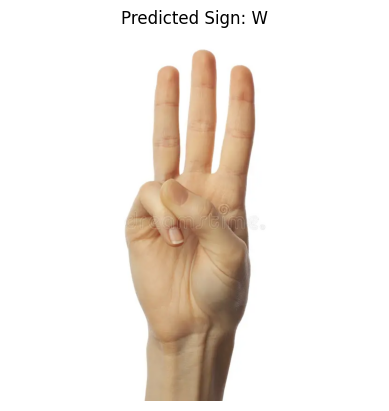

The predicted sign is: W


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_sign(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the sign
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_sign = list(traingenerator.class_indices.keys())[predicted_class]
    
    # Display the image
    plt.imshow(image.load_img(image_path))
    plt.title(f'Predicted Sign: {predicted_sign}')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    # Print the predicted sign
    print(f'The predicted sign is: {predicted_sign}')
    
    return predicted_sign

# Example usage
image_path = r"C:\Users\jsieg\OneDrive\Desktop\finger-spelling-letter-w-american-sign-language-white-background-asl-concept-finger-spelling-letter-w-american-sign-162121670.webp"
sign = predict_sign(image_path)
